<a href="https://colab.research.google.com/github/CJ445/CORIZO-AI-Major/blob/main/Spotify_Genre_Grouping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
file_path = 'spotify dataset.csv'
spotify_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
spotify_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


#1. Data Preprocessing

In [2]:
# Check for missing values
missing_values = spotify_data.isnull().sum()

# Check for duplicates
duplicates = spotify_data.duplicated().sum()

missing_values, duplicates


(track_id                    0
 track_name                  5
 track_artist                5
 track_popularity            0
 track_album_id              0
 track_album_name            5
 track_album_release_date    0
 playlist_name               0
 playlist_id                 0
 playlist_genre              0
 playlist_subgenre           0
 danceability                0
 energy                      0
 key                         0
 loudness                    0
 mode                        0
 speechiness                 0
 acousticness                0
 instrumentalness            0
 liveness                    0
 valence                     0
 tempo                       0
 duration_ms                 0
 dtype: int64,
 0)

In [3]:
# Drop rows with missing values in specific columns
spotify_data_cleaned = spotify_data.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

# Verify that there are no more missing values in these columns
spotify_data_cleaned.isnull().sum()


track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

#2. Data Analysis and Visualizations


## a. Distribution of Playlist Genres

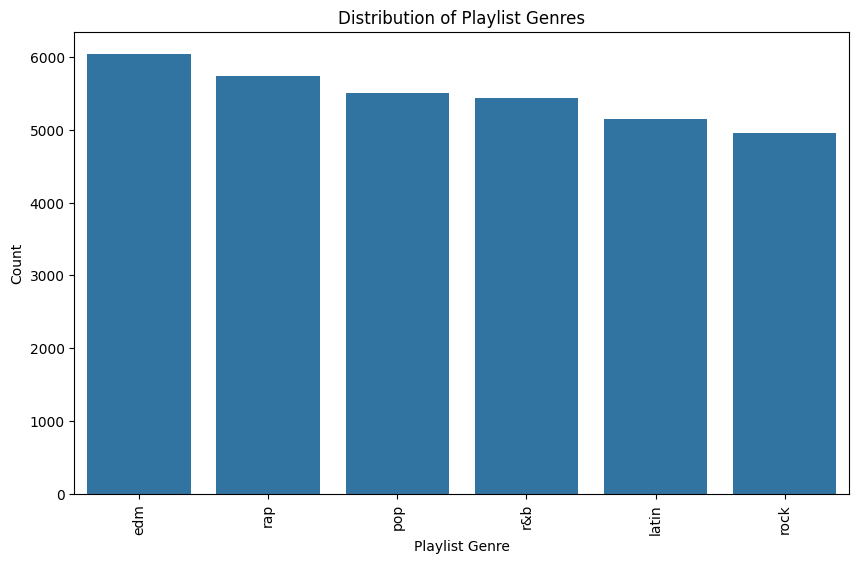

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of playlist genres
plt.figure(figsize=(10,6))
sns.countplot(data=spotify_data_cleaned, x='playlist_genre', order=spotify_data_cleaned['playlist_genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Playlist Genres')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.show()


## b. Popularity of Songs by Genre

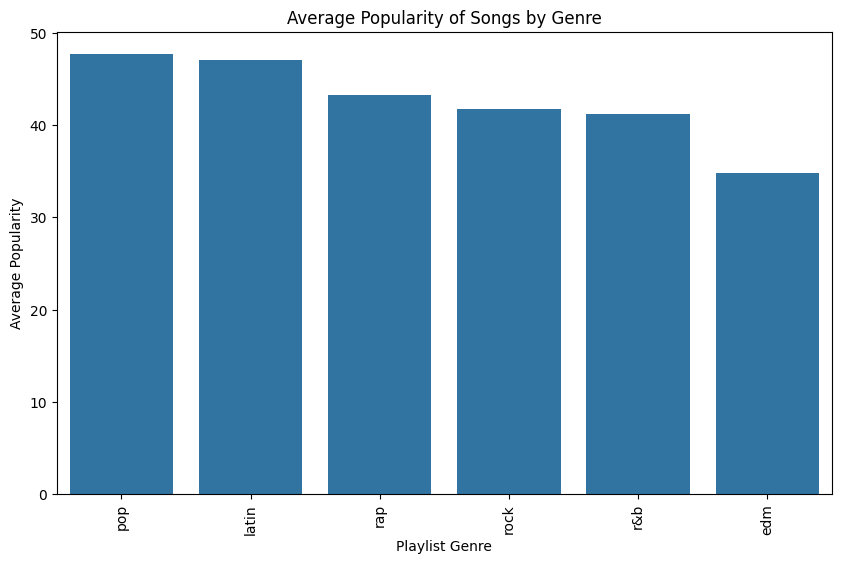

In [5]:
# Plot the average popularity of songs by genre
plt.figure(figsize=(10,6))
genre_popularity = spotify_data_cleaned.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.xticks(rotation=90)
plt.title('Average Popularity of Songs by Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Average Popularity')
plt.show()


## c. Correlation Matrix

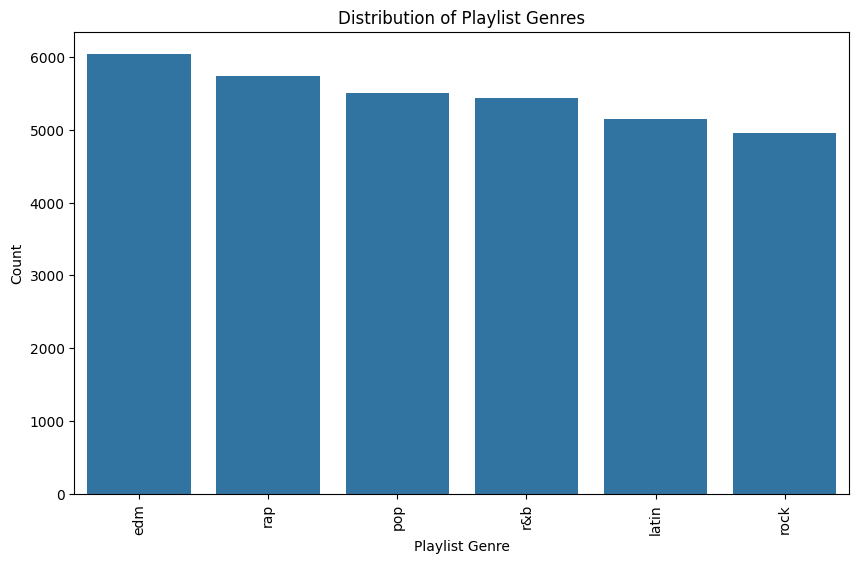

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of playlist genres
plt.figure(figsize=(10,6))
sns.countplot(data=spotify_data_cleaned, x='playlist_genre', order=spotify_data_cleaned['playlist_genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Playlist Genres')
plt.xlabel('Playlist Genre')
plt.ylabel('Count')
plt.show()


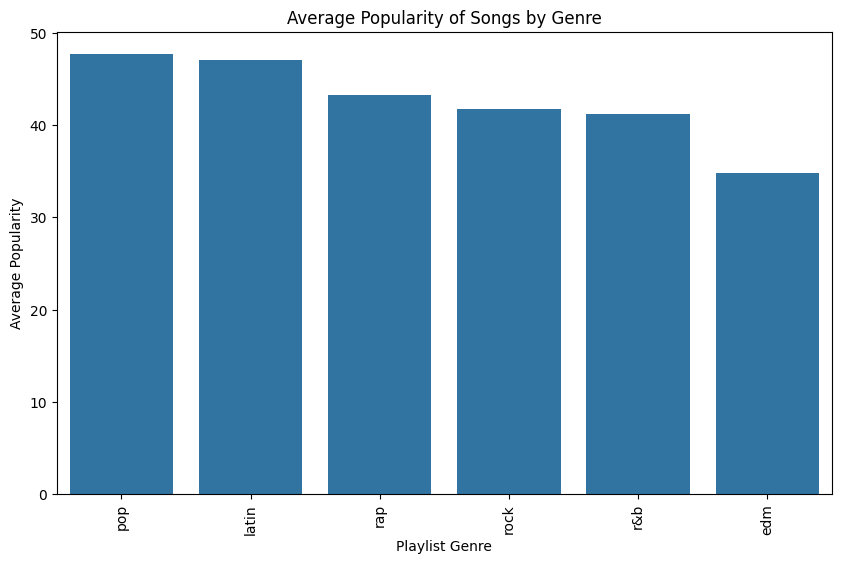

In [7]:
# Plot the average popularity of songs by genre
plt.figure(figsize=(10,6))
genre_popularity = spotify_data_cleaned.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.xticks(rotation=90)
plt.title('Average Popularity of Songs by Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Average Popularity')
plt.show()


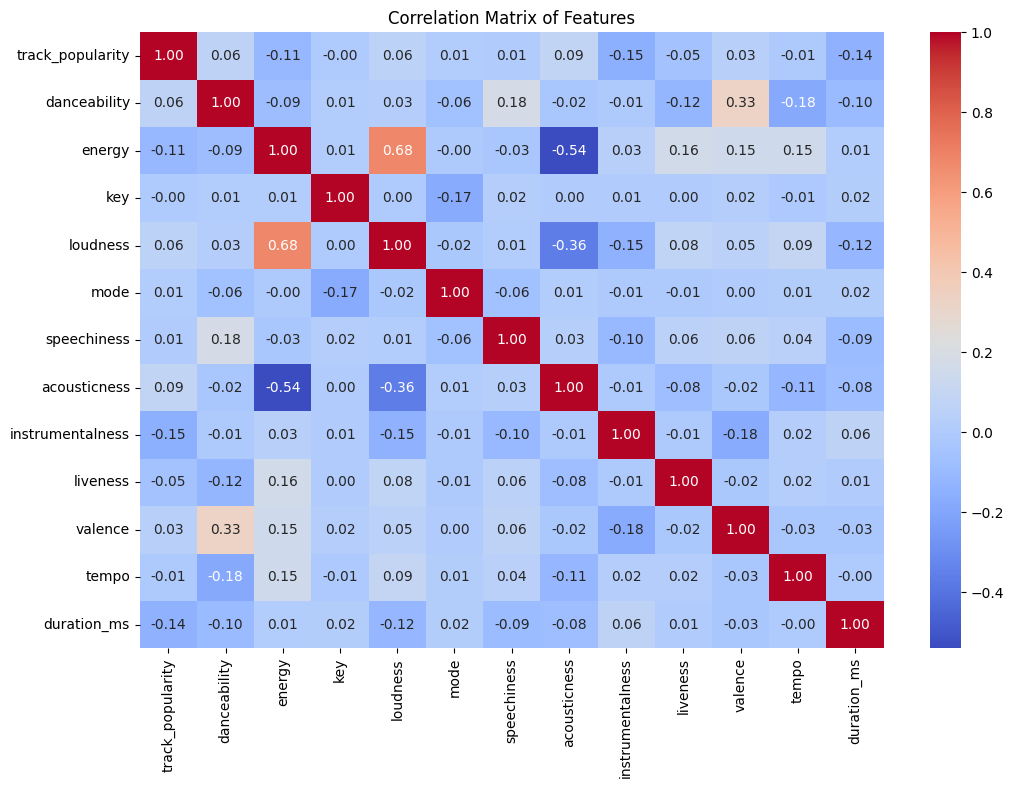

In [8]:
# Compute the correlation matrix, excluding non-numerical columns
correlation_matrix = spotify_data_cleaned.select_dtypes(include=['number']).corr()

# Plot the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# 3. Clustering Analysis
Next, let's identify and plot different clusters according to parameters like playlist genres and playlist names.

We'll use K-means clustering to group similar songs. To do this, we'll first need to select relevant features for clustering, such as danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, and tempo.

a. Standardize the features
We'll standardize the features before applying K-means clustering.

b. Apply K-means clustering
We'll use the elbow method to determine the optimal number of clusters.

c. Plot the clusters
Let's start with these steps:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

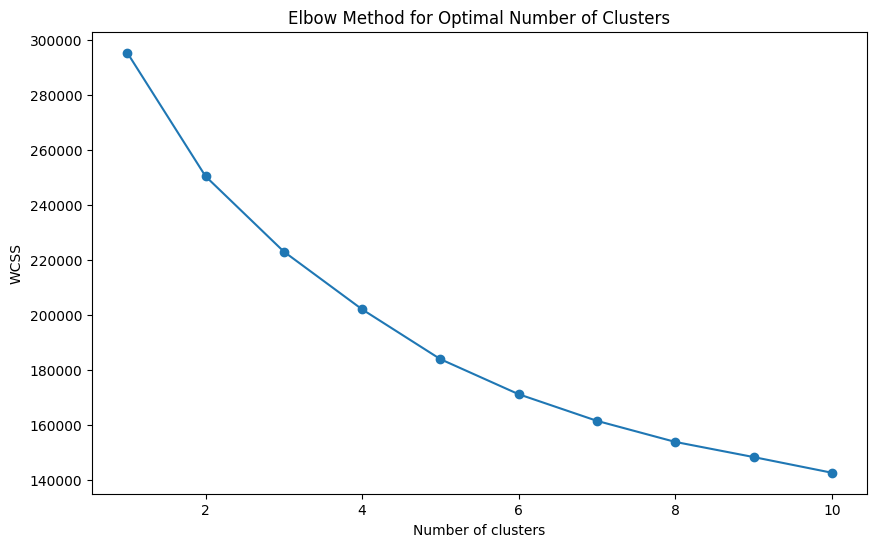

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-9-5625a413cb5a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['cluster'] = kmeans.fit_predict(X_scaled)
<ipython-input-9-5625a413cb5a>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_cleaned['pca1'] = X_pca[:, 0]
<ipython-in

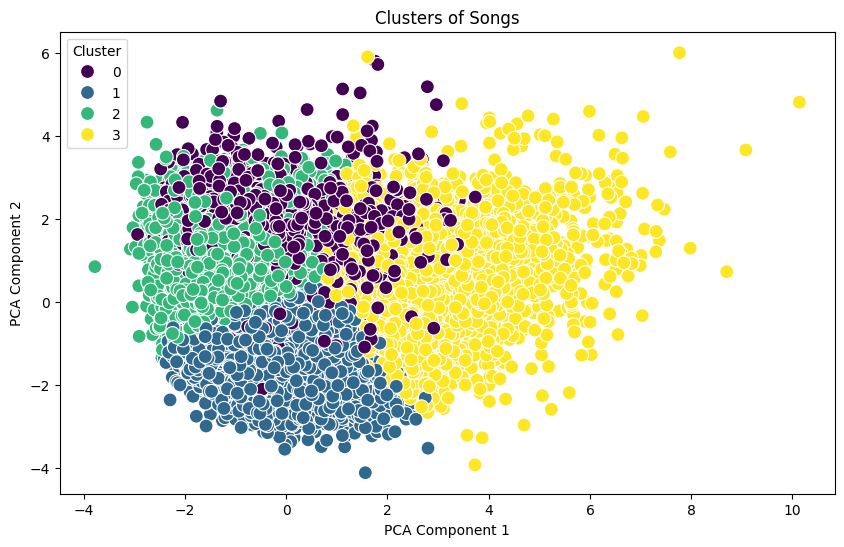

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = spotify_data_cleaned[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 4  # Assuming the elbow method suggests 4 clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
spotify_data_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
spotify_data_cleaned['pca1'] = X_pca[:, 0]
spotify_data_cleaned['pca2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data_cleaned, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100)
plt.title('Clusters of Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


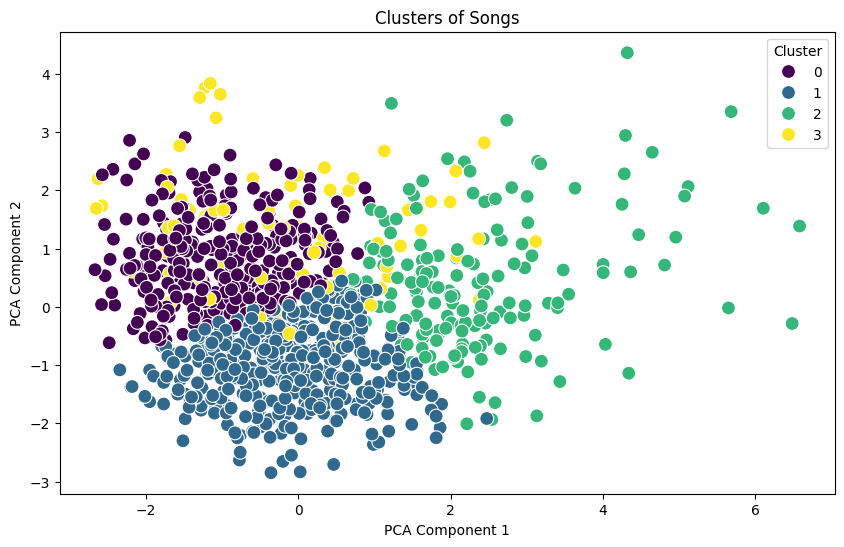

In [10]:
# Reduce the dataset size for quicker computation
spotify_sampled = spotify_data_cleaned.sample(n=1000, random_state=42)

# Select features for clustering
X_sampled = spotify_sampled[features]

# Standardize the features
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply K-means clustering with a fixed number of clusters (e.g., 4)
kmeans_sampled = KMeans(n_clusters=4, random_state=42)
spotify_sampled['cluster'] = kmeans_sampled.fit_predict(X_scaled_sampled)

# Reduce dimensions for visualization using PCA
X_pca_sampled = pca.fit_transform(X_scaled_sampled)
spotify_sampled['pca1'] = X_pca_sampled[:, 0]
spotify_sampled['pca2'] = X_pca_sampled[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_sampled, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100)
plt.title('Clusters of Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply K-means clustering with a fixed number of clusters (e.g., 4)
kmeans_sampled = KMeans(n_clusters=4, random_state=42)
spotify_sampled['cluster'] = kmeans_sampled.fit_predict(X_scaled_sampled)

# Verify the clustering results
spotify_sampled[['track_name', 'playlist_genre', 'cluster']].head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,track_name,playlist_genre,cluster
28680,Perfect (feat. Haris) - LUM!X Remix,edm,1
3578,Never Can Say Goodbye,pop,0
5304,A Waiting Game,pop,0
2678,I Would Like,pop,0
16995,Hawaiian Haze,latin,2


In [12]:
# Check data types
print(spotify_sampled.dtypes)

# Verify input data for clustering
print(X_sampled.head())

# Error handling for K-means clustering
try:
    # Standardize the features
    scaler = StandardScaler()
    X_scaled_sampled = scaler.fit_transform(X_sampled)

    # Apply K-means clustering with a fixed number of clusters (e.g., 4)
    kmeans_sampled = KMeans(n_clusters=4, random_state=42)
    spotify_sampled['cluster'] = kmeans_sampled.fit_predict(X_scaled_sampled)

    # Verify the clustering results
    print(spotify_sampled[['track_name', 'playlist_genre', 'cluster']].head())
except Exception as e:
    print(f"Error: {e}")


track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
cluster                       int32
pca1                        float64
pca2                        float64
dtype: object
       danceability  energy  loudness  speechiness

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Step-by-Step Debugging
1.Check for any non-numeric values in the feature set.

2.Validate the scaling operation.

3.Apply clustering to a very small subset of the data to isolate any issues.

In [13]:
# Ensure there are no non-numeric values in the features
import numpy as np
print(X_sampled.applymap(np.isreal).all())

# Validate the scaling operation
try:
    X_scaled_sampled = scaler.fit_transform(X_sampled)
    print("Scaling successful")
except Exception as e:
    print(f"Scaling error: {e}")

# Apply clustering to a very small subset of the data (e.g., 100 rows)
try:
    kmeans_sampled = KMeans(n_clusters=4, random_state=42)
    small_subset = X_scaled_sampled[:100]
    clusters = kmeans_sampled.fit_predict(small_subset)
    print("Clustering successful for small subset")
    print(clusters)
except Exception as e:
    print(f"Clustering error: {e}")


danceability        True
energy              True
loudness            True
speechiness         True
acousticness        True
instrumentalness    True
liveness            True
valence             True
tempo               True
dtype: bool
Scaling successful
Clustering successful for small subset
[2 2 0 2 1 1 0 0 2 1 2 2 1 0 3 1 2 2 1 2 1 1 3 2 0 3 2 1 2 2 2 2 2 1 1 1 2
 2 1 1 1 1 1 1 2 2 1 0 2 2 2 0 3 2 2 0 2 2 1 1 2 2 2 0 2 0 1 2 3 1 1 2 3 2
 2 2 2 1 2 0 2 2 0 2 0 2 3 1 2 2 1 0 1 0 2 1 0 0 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


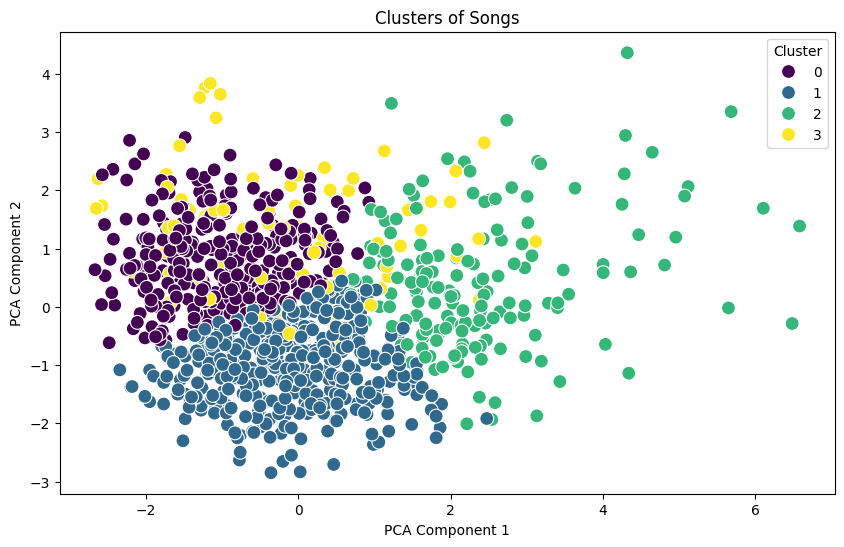

In [14]:
# Standardize the features
scaler = StandardScaler()
X_scaled_sampled = scaler.fit_transform(X_sampled)

# Apply K-means clustering with a fixed number of clusters (e.g., 4)
kmeans_sampled = KMeans(n_clusters=4, random_state=42)
spotify_sampled['cluster'] = kmeans_sampled.fit_predict(X_scaled_sampled)

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca_sampled = pca.fit_transform(X_scaled_sampled)
spotify_sampled['pca1'] = X_pca_sampled[:, 0]
spotify_sampled['pca2'] = X_pca_sampled[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_sampled, x='pca1', y='pca2', hue='cluster', palette='viridis', s=100)
plt.title('Clusters of Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


# 4. Building the Recommendation Model
To build a recommendation system, we can use a clustering-based approach or a collaborative filtering method. For simplicity, we'll use the clustering approach, where we recommend songs from the same cluster.

In [15]:
def recommend_songs(track_id, n_recommendations=5):
    if track_id not in spotify_sampled['track_id'].values:
        print(f"No track found with ID: {track_id}")
        return None

    # Find the cluster of the input song
    track_cluster = spotify_sampled[spotify_sampled['track_id'] == track_id]['cluster'].values[0]

    # Find other songs in the same cluster
    similar_songs = spotify_sampled[spotify_sampled['cluster'] == track_cluster]

    # Exclude the input song from the recommendations
    recommendations = similar_songs[similar_songs['track_id'] != track_id]

    # Select the top N recommendations based on popularity
    top_recommendations = recommendations.sort_values(by='track_popularity', ascending=False).head(n_recommendations)

    return top_recommendations[['track_name', 'track_artist', 'track_popularity']]

# List some available track IDs for testing
print("Available track IDs for testing:")
available_ids = spotify_sampled['track_id'].sample(10).values
print(available_ids)

# Example usage with a valid track ID from the above list
example_track_id = available_ids[0]
recommendations = recommend_songs(example_track_id)
print(recommendations)


Available track IDs for testing:
['2UkAjD17Sc1bH39sKCTCJN' '5QSYWruQQ7kBCHScI4xJ9g'
 '6KUyWWP7El9TZqzrDwdO9s' '4JXfNOePhdgMOI7KZ1L25U'
 '6TSlbHp7Vx4wZ0Rqciwn5v' '3JzfUGNaBr4KyZwadF2zBQ'
 '4tknhO5RmXIxnpoipMKBmG' '2cYnZNzFRFK0H7vSNxPsUq'
 '67cIB8595L7mYG1DWCqWNG' '6NabK7p4Fcor1gwBgv2jLQ']
                              track_name track_artist  track_popularity
17595                               Tusa      KAROL G                98
19264                    Don't Start Now     Dua Lipa                97
18295                            Ride It       Regard                94
23148                              China     Anuel AA                93
20095  10,000 Hours (with Justin Bieber)   Dan + Shay                91
